In [1]:
#importing necessary libraries
#tensorflow.compat.v1 library is used here instead of tensorflow as the placeholder method is not supported in tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

In [2]:
observations=1000

# considering two inputs
xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

inputs=np.column_stack((xs,zs))

# generating target
noise = np.random.uniform(-1,1,(observations,1))
target = 2*xs - 5*zs + 5 + noise

# saving the data set in a file with .npz extension as it is the file format supported in tensorflow
np.savez('TF_INTRO', rad1=inputs, rad2=target)

In [3]:
input_size=2
output_size=1

In [4]:
# setting up the inputs, targets, weights and bias for our model
"""
here nothing is calculated or displayed as a result as at first
we need to tell the tensorflow what it need to perform specifically
"""

# the below code is for outlining the model

tf.disable_v2_behavior()
rad1=tf.placeholder(tf.float32,[None,input_size])
rad2=tf.placeholder(tf.float32,[None,output_size])

weights=tf.Variable(tf.random_uniform([input_size,output_size],-0.1,0.1))
bias=tf.Variable(tf.random_uniform([output_size],-0.1,0.1))

# statement for the estimated output y=xw+b
output=tf.matmul(rad1,weights)+bias

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
# getting the loss function and the optimization function algorithm
# again nothing is printed as output as it is for outlining the model

# tf.losses contains many loss functions in it
mean_loss=tf.losses.mean_squared_error(rad2,output)/2.

# the learning rate is set to 0.05
# tf.train contains many optimization functions in it
optimize=tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

In [6]:
#preparing for execution
# in tensorflow the actual training is done inside the sessions
sess = tf.InteractiveSession()

In [7]:
#initializing the variables(tf.Variable) i.e., the weights and the bias

initializer=tf.global_variables_initializer()

sess.run(initializer)

In [8]:
# loading the data set file saved above in the notebook
training_data=np.load('TF_intro.npz')

In [9]:
# the epum ,or the loop in simple words, to train the model and find the least possible weights and bias
for e in range(100):
    
    # the first part inside the braces refer to the loss function and optimization function set up above
    # the second part is for feeding the data in the form of (inputs,targets) from the .npz file. It must be a dictionary
    """
    with each iteration, the data is feeded and the respective loss function is calculated 
    with the help of Gradient Descent Function. _, is used to supress the 'optimize' values
    as it will always give none as the output. We only want the 'mean_loss' values in order to train
    the model or in simple words, help the model learn
    """
    _, loss=sess.run([optimize,mean_loss], feed_dict={rad1: training_data['rad1'], rad2: training_data['rad2']})
    
    print(loss)

496.7056
224.35162
105.99009
53.15829
28.840216
17.229519
11.426737
8.350523
6.5925107
5.4941425
4.7404385
4.177242
3.7271633
3.3501441
3.024591
2.7382228
2.4835508
2.2556264
2.0508938
1.8666117
1.7005376
1.5507741
1.4156669
1.2937559
1.1837364
1.0844429
0.99482536
0.9139393
0.8409329
0.7750382
0.7155625
0.66187966
0.6134259
0.569692
0.5302181
0.49458888
0.4624296
0.4334035
0.40720382
0.3835569
0.36221248
0.34294787
0.32555902
0.309864
0.29569831
0.28291157
0.2713708
0.26095435
0.25155228
0.2430659
0.2354063
0.22849262
0.22225212
0.21661954
0.21153593
0.20694736
0.20280555
0.19906755
0.19569327
0.19264771
0.18989877
0.18741758
0.18517822
0.18315685
0.18133268
0.17968595
0.17819947
0.17685801
0.17564707
0.17455426
0.17356767
0.1726773
0.17187354
0.17114826
0.17049342
0.16990246
0.16936903
0.16888769
0.16845304
0.16806088
0.1677069
0.16738737
0.16709895
0.16683866
0.1666037
0.1663915
0.16620015
0.16602741
0.16587144
0.16573063
0.16560358
0.16548891
0.16538544
0.1652921
0.16520767
0.16513

In [10]:
# getting the size of weights and bias
print(weights,bias)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32_ref> <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


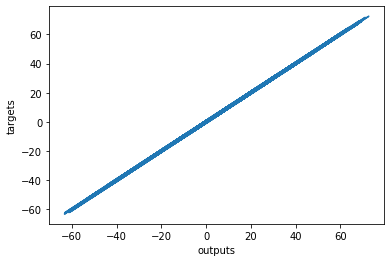

In [11]:
# plotting a targets vs outputs graph to depict the accuracy of the model
out = sess.run([output], feed_dict={rad1:training_data['rad1']})
plt.plot(np.squeeze(out),np.squeeze(training_data['rad2']))
plt.xlabel('outputs')
plt.ylabel('targets')
# a line approximately closer to 45 degree inclination will indicate a more accurate model
plt.show()